# **Regression Analysis: Simplify complex data relationships**

# Build a multiple linear regression model

**The purpose** of this project is to demonstrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model for fare amount prediction


### Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [2]:
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
from matplotlib import pyplot as plt
import seaborn as  sns

# Packages for date conversions for calculating trip durations
from datetime import datetime as dt
 
# Packages for OLS, MLR, confusion matrix
from statsmodels.formula.api import ols
from sklearn.metrics import confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

### Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df0.drop_duplicates().shape

(22699, 18)

Use `.describe()`.

In [8]:
# Use .describe()
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Convert pickup & dropoff columns to datetime


In [9]:
# Check the format of the data
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [10]:
# Convert datetime columns to datetime
df0['tpep_pickup_datetime'] = pd.to_datetime(df0.tpep_pickup_datetime)
df0['tpep_dropoff_datetime'] =pd.to_datetime(df0.tpep_dropoff_datetime)
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [11]:
# Create `duration` column
df0['duration'] = df0.tpep_dropoff_datetime - df0.tpep_pickup_datetime
df0['duration'] = df0.duration.dt.seconds/60

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [12]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

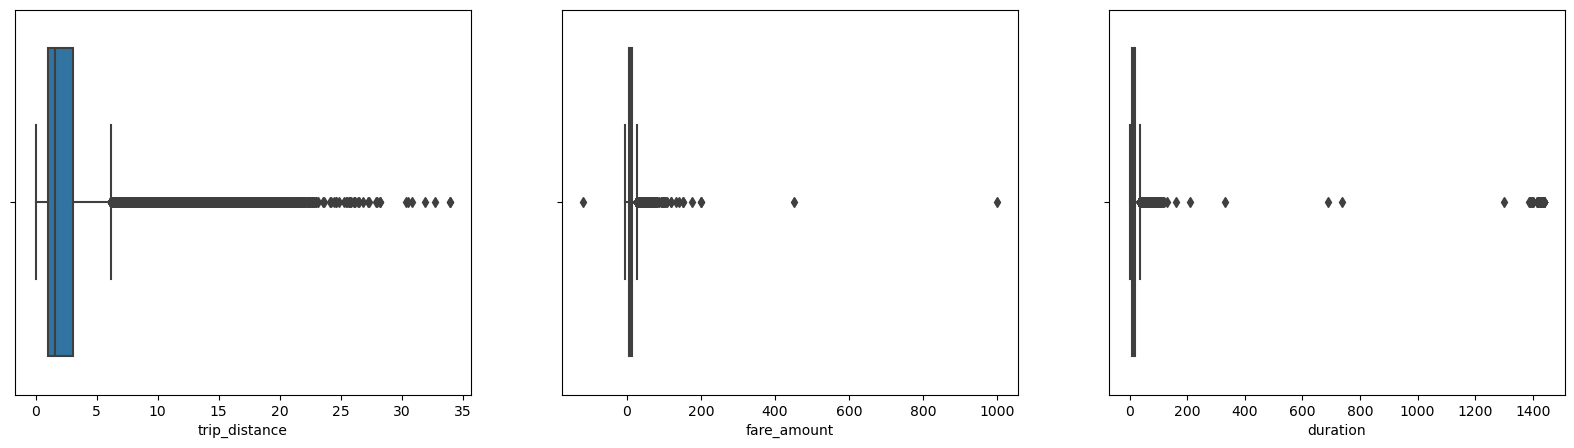

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df0.trip_distance)
plt.subplot(1,3,2)
sns.boxplot(x=df0.fare_amount)
plt.subplot(1,3,3)
sns.boxplot(x=df0.duration)
plt.show()


1. All of three contains outliers.

3. There isn't any unblievable values in trip distance.

5. Negative values doesn't make any sense for trip distance and duration, however fare amount can be negative for careless driving.

### Imputations

#### `trip_distance` outliers


In [14]:
# Are trip distances of 0 bad data or very short trips rounded down?
df0[df0['trip_distance']==0].sort_values(by=['fare_amount','duration'])

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
10281,55302347,2,2017-06-05 17:34:25,2017-06-05 17:36:29,2,0.0,1,N,238,238,4,-2.50,-1.0,-0.5,0.00,0.00,-0.3,-4.30,2.066667
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.0,1,N,264,193,1,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.033333
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.0,1,N,264,193,1,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.033333
22566,19022898,2,2017-03-07 02:24:47,2017-03-07 02:24:50,1,0.0,1,N,264,193,1,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.050000
14283,37675840,1,2017-05-03 19:44:28,2017-05-03 19:44:38,1,0.0,5,N,146,146,3,0.01,0.0,0.0,0.00,0.00,0.3,0.31,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7281,111091850,2,2017-01-01 03:02:53,2017-01-01 03:03:02,1,0.0,5,N,265,265,1,100.00,0.0,0.5,20.16,0.00,0.3,120.96,0.150000
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.0,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82,0.916667
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.0,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74,0.300000
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.0,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80,0.083333


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [15]:
df0[df0['trip_distance']<=0].shape

(148, 19)

#### `fare_amount` outliers

In [16]:
df0.sort_values(by='fare_amount').head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3,1395.683333
11204,58395501,2,2017-07-09 07:20:59,2017-07-09 07:23:50,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,2.850000
20698,14668209,2,2017-02-24 00:38:17,2017-02-24 00:42:05,1,0.70,1,N,65,25,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8,3.800000
14714,109276092,2,2017-12-24 22:37:58,2017-12-24 22:41:08,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3,3.166667
17602,24690146,2,2017-03-24 19:31:13,2017-03-24 19:34:49,1,0.46,1,N,87,45,4,-4.0,-1.0,-0.5,0.0,0.0,-0.3,-5.8,3.600000
5448,28459983,2,2017-04-06 12:50:26,2017-04-06 12:52:39,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3,2.216667
20317,75926915,2,2017-09-09 22:59:51,2017-09-09 23:02:06,1,0.24,1,N,116,116,4,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,2.250000
8204,91187947,2,2017-10-28 20:39:36,2017-10-28 20:41:59,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8,2.383333
18565,43859760,2,2017-05-22 15:51:20,2017-05-22 15:52:22,1,0.10,1,N,230,163,3,-3.0,0.0,-0.5,0.0,0.0,-0.3,-3.8,1.033333
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,1.333333


In [17]:
# Impute values less than $0 with 0
df0['fare_amount'] = np.where(df0.fare_amount < 0,0,df0.fare_amount)
df0.fare_amount.sort_values()

5448       0.00
14714      0.00
11204      0.00
5758       0.00
12944      0.00
          ...  
12511    175.00
15474    200.00
13861    200.01
20312    450.00
8476     999.99
Name: fare_amount, Length: 22699, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [28]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

In [29]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [30]:
# Call .describe() for duration outliers
df0['duration'].describe()

count    22699.000000
mean        17.077216
std         62.694515
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [32]:
# Impute a 0 for any negative values
df0.loc[df0['duration'] < 0, 'duration'] = 0
df0['duration'].min()

0.0

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.464466
std         11.956838
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



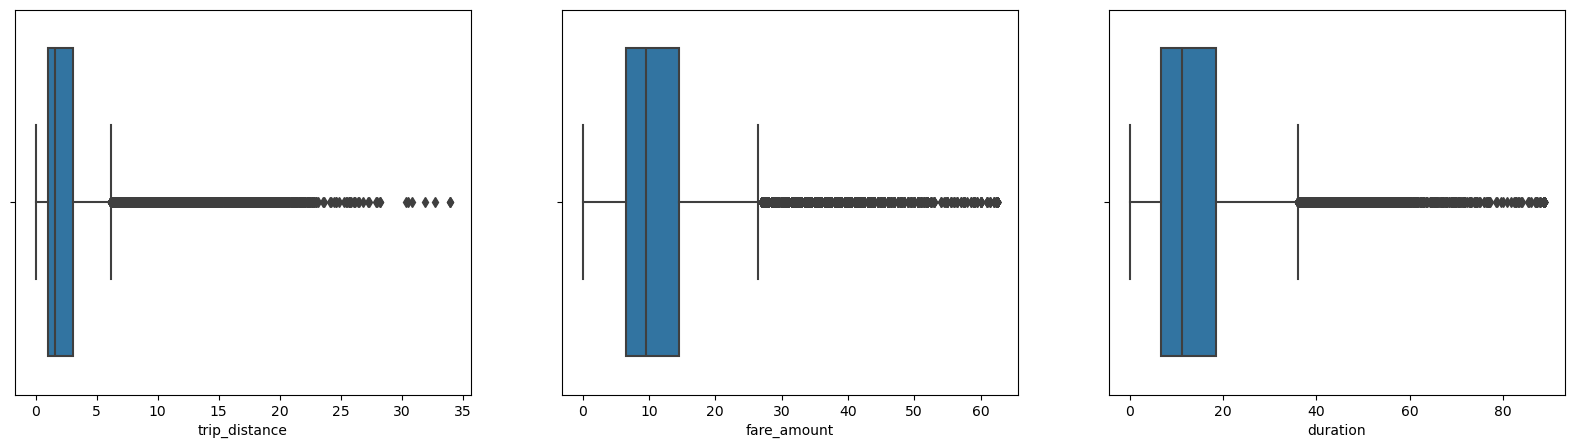

In [33]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(x=df0.trip_distance)
plt.subplot(1,3,2)
sns.boxplot(x=df0.fare_amount)
plt.subplot(1,3,3)
sns.boxplot(x=df0.duration)
plt.show()

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [34]:
# Create `pickup_dropoff` column
df0['pickup_dropoff'] = df0.PULocationID.astype(str)+ ' ' + df0.DOLocationID.astype(str)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [36]:
grouped = df0.groupby('pickup_dropoff')[['trip_distance']].mean()

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [37]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()
# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [38]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0.pickup_dropoff.copy()
# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0.mean_distance.map(grouped_dict)
# Confirm that it worked
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [39]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
mean_duration = df0.groupby('pickup_dropoff')['duration'].mean()
mean_duration_dict = mean_duration.to_dict()
mean_duration_dict
# Confirm that it worked
df0['mean_duration'] = df0.pickup_dropoff.copy()
df0['mean_duration'] = df0['mean_duration'].map(mean_duration_dict)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [40]:
# Create 'day' col
df0['day'] = df0.tpep_pickup_datetime.dt.strftime('%A')
# Create 'month' col
df0['month'] = df0.tpep_pickup_datetime.dt.strftime('%B')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [41]:
# Create 'rush_hour' col
df0['rush_hour'] = np.where(
    ((df0.tpep_pickup_datetime.dt.hour >= 6) & (df0.tpep_pickup_datetime.dt.hour <= 10)) | ((df0.tpep_pickup_datetime.dt.hour >= 16) & (df0.tpep_pickup_datetime.dt.hour <= 20))\
    ,1,0)
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0['rush_hour'] = np.where(df0.tpep_pickup_datetime.dt.day_name().isin(['Saturday', 'Sunday']) ,0,df0['rush_hour'])
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,...,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,Friday,February,1
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,...,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,Sunday,August,0
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,...,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,Monday,September,0
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,...,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,Saturday,July,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

<Axes: xlabel='mean_duration', ylabel='fare_amount'>

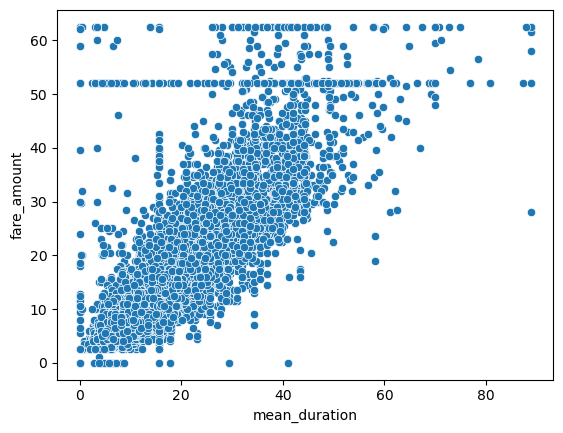

In [42]:
# Create a scatterplot to visualize the relationship between variables of interest
sns.scatterplot(x=df0.mean_duration,y=df0.fare_amount)

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [43]:
# Set pandas to display all columns
pd.set_option('display.max_columns',100)


Examine the first 30 of these trips.

In [44]:
df0[df0['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,April,0


The second horizontal line is also due to imputed for outliers, but this time it is trip distance

### Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [45]:
df0.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'pickup_dropoff', 'mean_distance', 'mean_duration', 'day', 'month',
       'rush_hour'],
      dtype='object')

In [46]:
df = df0[['fare_amount', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'pickup_dropoff', 'mean_distance', 'mean_duration', 'day', 'month','rush_hour']]

In [47]:
df

,fare_amount,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,13.0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,16.0,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
2,6.5,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,20.5,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,16.5,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,4.0,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,Friday,February,1
22695,52.0,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,Sunday,August,0
22696,4.5,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,Monday,September,0
22697,10.5,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,Saturday,July,0


### Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

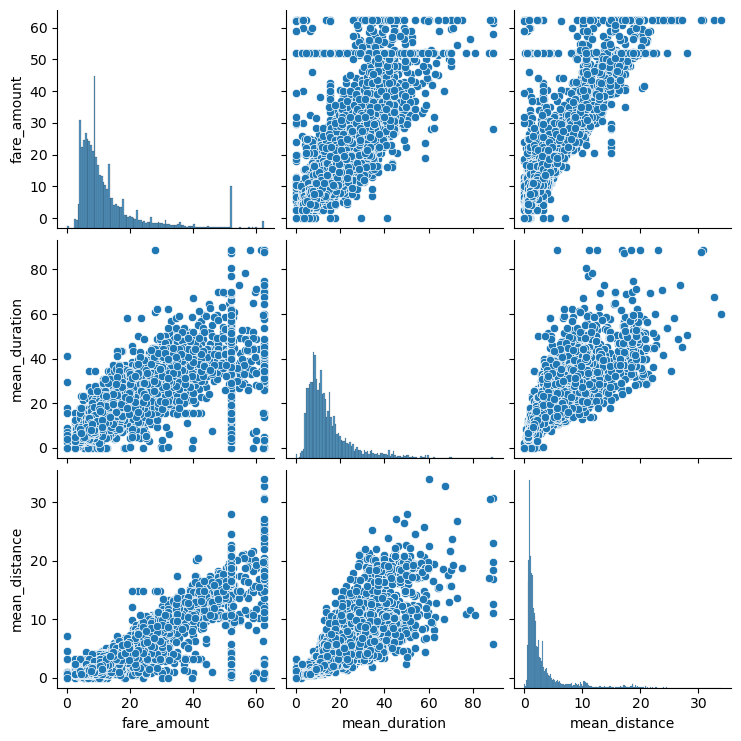

In [49]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df[['fare_amount','mean_duration', 'mean_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [50]:
# Correlation matrix to help determine most correlated variables
corr_df = df.select_dtypes(np.number).corr()
corr_df.sort_values(by='fare_amount',ascending=False)

,fare_amount,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,rush_hour
fare_amount,1.000000,0.001045,0.014942,0.924626,0.222102,-0.072600,-0.088849,-0.049516,0.097632,-0.141438,0.542246,0.616719,0.029979,0.845757,0.830823,0.910185,0.858673,-0.025901
trip_distance,0.924626,0.007782,0.016496,1.000000,0.153032,-0.080737,-0.093342,-0.044716,0.110330,-0.083288,0.502242,0.622857,0.019569,0.767182,0.759235,0.974220,0.851626,-0.047428
mean_distance,0.910185,0.004741,0.013428,0.974220,0.159353,-0.082874,-0.095812,-0.044495,0.110774,-0.087264,0.498897,0.621229,0.016729,0.753129,0.737862,1.000000,0.874161,-0.046794
mean_duration,0.858673,0.001440,0.015640,0.851626,0.111515,-0.074367,-0.087785,-0.052937,0.104272,-0.037647,0.457852,0.511586,0.021772,0.694195,0.844079,0.874161,1.000000,-0.027766
total_amount,0.845757,0.000687,0.007724,0.767182,0.226681,-0.050302,-0.062068,-0.118319,0.104406,-0.199457,0.770913,0.584475,0.043972,1.000000,0.660242,0.753129,0.694195,-0.006088
duration,0.830823,0.004329,0.016580,0.759235,0.088635,-0.062772,-0.074098,-0.037476,0.097915,-0.030063,0.421529,0.439473,0.015333,0.660242,1.000000,0.737862,0.844079,0.018405
tolls_amount,0.616719,0.011122,0.009532,0.622857,0.175860,-0.041886,-0.033808,-0.041217,0.060402,-0.238170,0.422326,1.000000,0.006405,0.584475,0.439473,0.621229,0.511586,-0.000694
tip_amount,0.542246,-0.000468,-0.009975,0.502242,0.118044,-0.022284,-0.034482,-0.445044,0.064483,-0.126416,1.000000,0.422326,0.015687,0.770913,0.421529,0.498897,0.457852,0.008822
RatecodeID,0.222102,-0.002991,-0.005743,0.153032,1.000000,0.003768,0.007020,-0.000982,0.019638,-0.199324,0.118044,0.175860,-0.017291,0.226681,0.088635,0.159353,0.111515,0.004145
extra,0.097632,0.001642,-0.006339,0.110330,0.019638,-0.010923,-0.019478,-0.024838,1.000000,0.050816,0.064483,0.060402,0.040666,0.104406,0.097915,0.110774,0.104272,0.325011


Visualize a correlation heatmap of the data.

<Axes: >

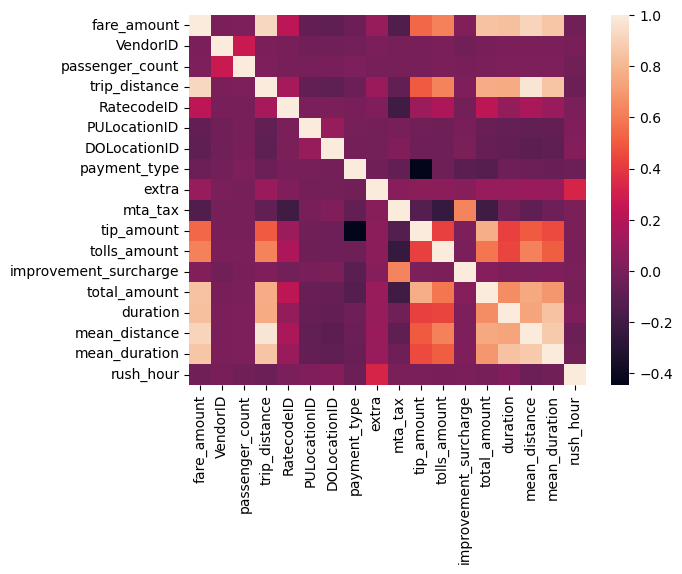

In [51]:
# Create correlation heatmap
sns.heatmap(corr_df)

### Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [52]:
# Remove the target column from the features
X = df.drop(columns='fare_amount')

# Set y variable
y = df['fare_amount']
# Display first few rows
X

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,Friday,February,1
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,Sunday,August,0
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,Monday,September,0
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,Saturday,July,0


### Pre-process data


Dummy encode categorical variables

In [53]:
# Convert VendorID to string
X['VendorID'] = X.VendorID.astype(str)
# Get dummies
dummies_df =pd.get_dummies(df['VendorID'],prefix="Vendor",dtype=int)
X = pd.concat((X,dummies_df),axis=1)
X

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,Vendor_1,Vendor_2
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0,0,1
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0,1,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1,1,0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0,0,1
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,Friday,February,1,0,1
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,Sunday,August,0,0,1
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,Monday,September,0,0,1
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,Saturday,July,0,0,1


In [54]:
dummies_df =pd.get_dummies(df['store_and_fwd_flag'],prefix="store_and_fwd_flag",dtype=int)
X= pd.concat((X,dummies_df),axis=1)
X

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,Vendor_1,Vendor_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0,0,1,1,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0,1,0,1,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1,1,0,1,0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0,0,1,1,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,Friday,February,1,0,1,1,0
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,Sunday,August,0,0,1,1,0
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,Monday,September,0,0,1,1,0
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,Saturday,July,0,0,1,1,0


In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
le = LabelEncoder()

In [57]:
X['day'] = le.fit_transform(X['day'])

In [58]:
X['month'] = le.fit_transform(X['month'])

In [59]:
X

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,Vendor_1,Vendor_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,100 231,3.521667,22.847222,2,7,0,0,1,1,0
1,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,186 43,3.108889,24.470370,5,0,0,1,0,1,0
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,262 236,0.881429,7.250000,0,2,1,1,0,1,0
3,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,188 97,3.700000,30.250000,3,8,0,0,1,1,0
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,4 112,4.435000,14.616667,2,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,48 186,1.098214,8.594643,0,3,1,0,1,1,0
22695,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,132 164,18.757500,59.560417,3,1,0,0,1,1,0
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,107 234,0.684242,6.609091,1,11,0,0,1,1,0
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,68 144,2.077500,16.650000,2,5,0,0,1,1,0


In [60]:
X.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'duration', 'pickup_dropoff', 'mean_distance', 'mean_duration', 'day',
       'month', 'rush_hour', 'Vendor_1', 'Vendor_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y'],
      dtype='object')

In [61]:
X = X[[ 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'duration', 'mean_distance', 'mean_duration', 'day',
       'month', 'rush_hour', 'Vendor_1', 'Vendor_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y']]
X.describe()
X.shape


(22699, 22)

In [62]:
### YOUR CODE HERE ###
corr_df = X.select_dtypes(np.number).corr()
corr_df

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,mean_distance,mean_duration,day,month,rush_hour,Vendor_1,Vendor_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
passenger_count,1.000000,0.016496,-0.005743,-0.005721,0.000332,0.016178,-0.006339,-0.006293,-0.009975,0.009532,-0.001418,0.007724,0.016580,0.013428,0.015640,-0.009970,-0.006834,-0.024283,-0.266463,0.266463,0.021114,-0.021114
trip_distance,0.016496,1.000000,0.153032,-0.080737,-0.093342,-0.044716,0.110330,-0.083288,0.502242,0.622857,0.019569,0.767182,0.759235,0.974220,0.851626,-0.006542,0.002387,-0.047428,-0.007782,0.007782,-0.007317,0.007317
RatecodeID,-0.005743,0.153032,1.000000,0.003768,0.007020,-0.000982,0.019638,-0.199324,0.118044,0.175860,-0.017291,0.226681,0.088635,0.159353,0.111515,0.001118,-0.009118,0.004145,0.002991,-0.002991,0.001223,-0.001223
PULocationID,-0.005721,-0.080737,0.003768,1.000000,0.097142,-0.006449,-0.010923,-0.000755,-0.022284,-0.041886,0.000165,-0.050302,-0.062772,-0.082874,-0.074367,0.019743,0.000902,0.022573,0.025236,-0.025236,0.001303,-0.001303
DOLocationID,0.000332,-0.093342,0.007020,0.097142,1.000000,-0.011300,-0.019478,0.027497,-0.034482,-0.033808,0.008885,-0.062068,-0.074098,-0.095812,-0.087785,0.018992,-0.004316,0.039698,0.023098,-0.023098,0.012251,-0.012251
payment_type,0.016178,-0.044716,-0.000982,-0.006449,-0.011300,1.000000,-0.024838,-0.077528,-0.445044,-0.041217,-0.101198,-0.118319,-0.037476,-0.044495,-0.052937,-0.023417,-0.010892,-0.049030,0.017787,-0.017787,-0.011652,0.011652
extra,-0.006339,0.110330,0.019638,-0.010923,-0.019478,-0.024838,1.000000,0.050816,0.064483,0.060402,0.040666,0.104406,0.097915,0.110774,0.104272,0.038142,0.000983,0.325011,-0.001642,0.001642,0.004323,-0.004323
mta_tax,-0.006293,-0.083288,-0.199324,-0.000755,0.027497,-0.077528,0.050816,1.000000,-0.126416,-0.238170,0.628518,-0.199457,-0.030063,-0.087264,-0.037647,0.004854,0.002888,0.009590,0.008400,-0.008400,-0.004285,0.004285
tip_amount,-0.009975,0.502242,0.118044,-0.022284,-0.034482,-0.445044,0.064483,-0.126416,1.000000,0.422326,0.015687,0.770913,0.421529,0.498897,0.457852,0.009656,0.010020,0.008822,0.000468,-0.000468,-0.002071,0.002071
tolls_amount,0.009532,0.622857,0.175860,-0.041886,-0.033808,-0.041217,0.060402,-0.238170,0.422326,1.000000,0.006405,0.584475,0.439473,0.621229,0.511586,-0.002850,0.004707,-0.000694,-0.011122,0.011122,-0.006918,0.006918


<Axes: >

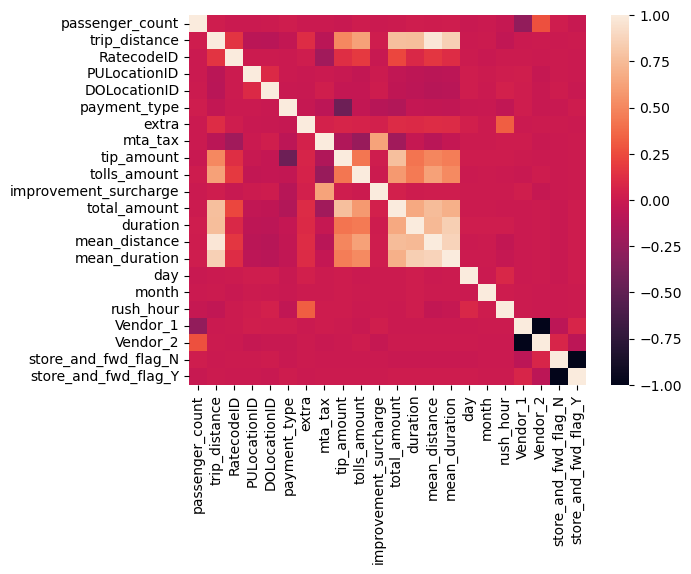

In [63]:
sns.heatmap(corr_df)

In [64]:
# Fit your model to the training data
ols_formula = 'fare_amount ~ C(passenger_count) + trip_distance + C(RatecodeID) + PULocationID + DOLocationID + C(payment_type) + duration + mean_distance + mean_duration + C(day) + C(month) + rush_hour + C(Vendor_1) + C(Vendor_2) + C(store_and_fwd_flag_N) + C(store_and_fwd_flag_Y)'
ols_data = pd.concat([X,y],axis=1)
OLS = ols(formula=ols_formula, data=ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     6616.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        13:22:08   Log-Likelihood:                -56843.
No. Observations:               22699   AIC:                         1.138e+05
Df Residuals:                   22658   BIC:                         1.141e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.6107      0.279      5.769      0.000       1.063       2.158
C(passenger_count)[T.1]          0.1048      0.526      0.199      0.842      -0.926       1.135
C(passenger_count)[T.2]          0.1332      0.528      0.252      0.801      -0.902       1.168
C(passenger_count)[T.3]          0.1355      0.534      0.254      0.800      -0.912       1.183
C(passenger_count)[T.4]          0.2106      0.543      0.387      0.698      -0.855       1.276
C(passenger_count)[T.5]          0.1783      0.534      0.334      0.738      -0.868       1.224
C(passenger_count)[T.6]          0.0286      0.538      0.053      0.958      -1.027       1.084
C(RatecodeID)[T.2]               5.9101      0.168     35.267      0.000       5.582       6.239
C(RatecodeID)[T.3]              15.2837      0.488     31.328      0.000      14.327      16.240
C(RatecodeID)[T.4]               6.2223      1.060      5.872      0.000       4.145       8.299
C(RatecodeID)[T.5]              25.8222      0.362     71.263      0.000      25.112      26.532
C(RatecodeID)[T.99]             57.7662      3.011     19.182      0.000      51.863      63.669
C(payment_type)[T.2]            -0.1247      0.042     -2.939      0.003      -0.208      -0.042
C(payment_type)[T.3]            -1.4964      0.272     -5.501      0.000      -2.030      -0.963
C(payment_type)[T.4]            -2.4872      0.438     -5.675      0.000      -3.346      -1.628
C(day)[T.1]                     -0.0427      0.075     -0.570      0.569      -0.190       0.104
C(day)[T.2]                     -0.1541      0.076     -2.033      0.042      -0.303      -0.006
C(day)[T.3]                     -0.1849      0.078     -2.371      0.018      -0.338      -0.032
C(day)[T.4]                      0.0136      0.072      0.190      0.849      -0.127       0.154
C(day)[T.5]                      0.1354      0.073      1.852      0.064      -0.008       0.279
C(day)[T.6]                      0.0500      0.072      0.694      0.487      -0.091       0.191
C(month)[T.1]                    0.1601      0.097      1.644      0.100      -0.031       0.351
C(month)[T.2]                    0.1832      0.095      1.920      0.055      -0.004       0.370
C(month)[T.3]                    0.1197      0.097      1.239      0.215      -0.070       0.309
C(month)[T.4]                    0.2130      0.094      2.274      0.023       0.029       0.397
C(month)[T.5]                    0.1539      0.098      1.575      0.115      -0.038       0.345
C(month)[T.6]                    0.1420      0.094      1.510      0.131      -0.042       0.326
C(month)[T.7]                    0.2609      0.093      2.804      0.005       0.079       0.443
C(month)[T.8]                    0.2035      0.093      2.177      0.030    

In [65]:
ols_formula = 'fare_amount ~ duration + mean_distance'
ols_data = pd.concat([X,y],axis=1)
OLS = ols(formula=ols_formula, data=ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                 8.656e+04
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        13:22:17   Log-Likelihood:                -61213.
No. Observations:               22699   AIC:                         1.224e+05
Df Residuals:                   22696   BIC:                         1.225e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.8124      0.037     75.039      0.000       2.739       2.886
duration          0.3081      0.003    104.395      0.000       0.302       0.314
mean_distance     1.9319      0.010    194.818      0.000       1.913       1.951
==============================================================================
Omnibus:                    31179.023   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12781288.619
Skew:                           7.826   Prob(JB):                         0.00
Kurtosis:                     118.191   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Split data into training and test sets

In [66]:
X.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'mean_distance', 'mean_duration', 'day', 'month', 'rush_hour',
       'Vendor_1', 'Vendor_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y'],
      dtype='object')

In [67]:
X = X[['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'duration',
       'mean_distance', 'mean_duration', 'day', 'month', 'rush_hour',
       'Vendor_1', 'Vendor_2', 'store_and_fwd_flag_N', 'store_and_fwd_flag_Y']]

The following columns are not known in advance so they are removed from training set.

'payment_type', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge', 'total_amount',

In [69]:
# Create training and testing sets
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.20,random_state=42)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [70]:
X_train.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,duration,mean_distance,mean_duration,day,month,rush_hour,Vendor_1,Vendor_2,store_and_fwd_flag_N,store_and_fwd_flag_Y
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,1.638141,2.941697,1.045322,162.906658,161.223360,1.338565,14.568029,2.940057,14.577215,3.022028,5.524864,0.377058,0.445179,0.554821,0.995760,0.004240
std,1.279379,3.704203,0.779660,66.459306,70.127128,0.497073,12.098281,3.601354,10.206936,2.020236,3.442193,0.484663,0.496999,0.496999,0.064981,0.064981
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,114.000000,112.000000,1.000000,6.666667,1.011622,8.055128,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,11.233333,1.622857,11.608333,3.000000,6.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,3.100000,1.000000,233.000000,233.000000,2.000000,18.500000,3.146667,17.405556,5.000000,8.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,88.783333,33.920000,88.783333,6.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
# Standardize the X variables
from sklearn.preprocessing import StandardScaler

sc =StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_train.dtype

dtype('float64')

### Fit the model

Instantiate your model and fit it to the training data.

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [73]:
model = LinearRegression()

In [74]:
model.fit(X_train,y_train)

LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [77]:
# Evaluate the model performance on the training data
y_pred = model.predict(X_train)
print("MAE: ",mean_absolute_error(y_train, y_pred),"\nMSE: ", mean_squared_error(y_train, y_pred),"\nR2 Score: " , r2_score(y_train, y_pred))

MAE:  1.102930252850364 
MSE:  10.580296953592512 
R2 Score:  0.9063850025337495


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [79]:
# Scale the X_test data
X_test = sc.transform(X_test)

In [80]:
# Evaluate the model performance on the testing data
y_pred = model.predict(X_test)
print("MAE: ",mean_absolute_error(y_test, y_pred),"\nMSE: ", mean_squared_error(y_test, y_pred) ,"\nRMSE: ",np.sqrt( mean_squared_error(y_test, y_pred)),"\nR2 Score: " , r2_score(y_test, y_pred))


MAE:  66.15869835204336 
MSE:  6855.628111654392 
RMSE:  82.79872047111834 
R2 Score:  -65.32747307681409


### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [82]:
# Create a `results` dataframe
result_df = pd.DataFrame(dict(actual=y_test,predicted=y_pred,residual=(y_test-y_pred))).reset_index(drop=True)
result_df

,actual,predicted,residual
0,12.5,84.385994,-71.885994
1,6.0,31.770866,-25.770866
2,12.0,79.233164,-67.233164
3,20.5,126.276182,-105.776182
4,14.0,83.539139,-69.539139
...,...,...,...
4535,6.5,40.705411,-34.205411
4536,7.5,44.288075,-36.788075
4537,3.5,23.226350,-19.726350
4538,9.5,66.755461,-57.255461


### Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

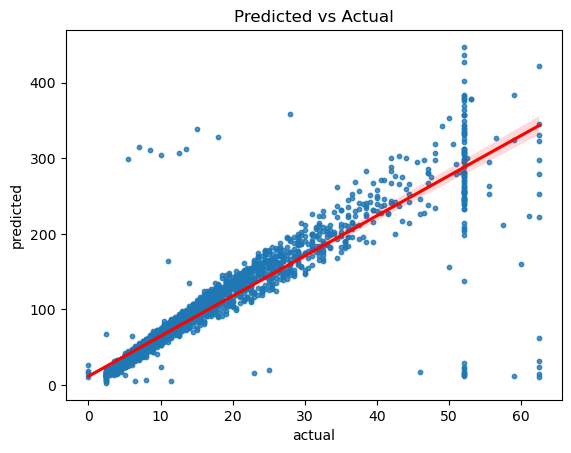

In [83]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.regplot(x=result_df.actual,y=result_df.predicted,line_kws={"color": "red"}, scatter_kws={"s": 10})
plt.title('Predicted vs Actual')
plt.savefig('Predicted_vs_Actual.png')
plt.show()

Visualize the distribution of the `residuals` using a histogram.

<Axes: >

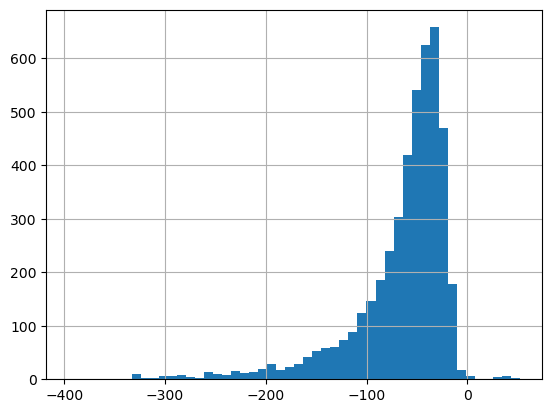

In [84]:
# Visualize the distribution of the `residuals`
result_df.residual.hist(bins=50)

In [85]:
# Calculate residual mean
result_df.residual.mean()

-65.92286732443212

Create a scatterplot of `residuals` over `predicted`.

<Axes: xlabel='predicted', ylabel='residual'>

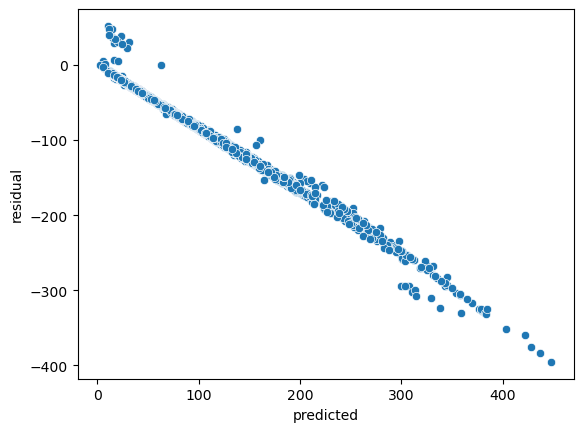

In [86]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x=result_df.predicted,y=result_df.residual)


### Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [87]:
X.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'duration', 'mean_distance',
       'mean_duration', 'day', 'month', 'rush_hour', 'Vendor_1', 'Vendor_2',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y'],
      dtype='object')

In [88]:
# Output the model's coefficients
model.coef_

array([ 1.02065089e-03,  5.23956706e+00,  8.86675604e-01,  2.01407927e-02,
       -4.46966742e-02, -7.70487572e-02,  3.22456585e+00,  1.85231320e+00,
        2.40727905e-01,  3.35167606e-02,  2.46506232e-02,  6.60345440e-04,
        2.39479078e-02, -2.39479078e-02, -1.53783739e-02,  1.53783739e-02])

### Conclusion


1. Duration and distance are correlated with fare amount.
2. Increasing 1 minute in the trip will increase ~3 dollars in fare and increasing 1 km in the trip will increase ~$5 in fare amount.
